## Stardew Valley Analysis

What is the probability of having a particular amount of money in Stardew Valley?
This post was prompted by [this Reddit post](https://reddit.com/r/StardewValley/comments/1amkxs3/what_are_the_odds/) on r/StardewValley.

Image: stardew_valley_reddit_post.png
**"Just casually playing then got a perfect $111,111" What are the odds of having exactly 111,111 gold during normal play?**

The first thing to notice about this problem is that it's determined by how you play the game. 
In Stardew Valley, you generally gain gold by selling items and lose gold by buying items. 
So, the amount of gold you have is some function of the items you have, the items you want, the items you can buy, and the gold you have.

To determine the probability of having a particular amount of money, we could attempt to model the changes to your gold amount by observing your play, but in my opinion that won't lead to a very satisfying answer. Instead, I might like to reason in reverse: if I adopted a particular style of play, how likely is it that I would stumble onto a particular gold total? This approach ignores individual play differences and focuses on the likelihood of a particular gold total relative to other gold totals given assumptions about playstyle.

To answer the question, I'll use a highly simplified play model:
 - The player never decreases their money total. In other words, we will ignore all player purchases e.g. seeds. Getting to a special number "from above" is less exciting than getting to it from below!
 - The player will only make money by selling the 30 [crops](https://stardewvalleywiki.com/Crops) for which the player can buy seeds from Pierre/JojaMart.
 - The player will sell crops one at a time. (In other words, the player doesn't sell in bulk using the bin.)
 - The player is farming level 1 and doesn't use fertilizer. (That means no Iridium-quality crops will appear.)
 - The player has access to a stockpile of all crops and will sell crops out of season.

[`pandas`](https://pandas.pydata.org/) uses [`lxml`](https://lxml.de/)


In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import binomtest
import matplotlib

In [5]:
# first: "Save Page As..." to save the HTML of the Stardew Valley Wiki's Crops page https://stardewvalleywiki.com/Crops
with open("data/raw/crops_stardew_valley_wiki.html") as infile:
    dfs = pd.read_html(infile)
len(dfs)

121

In [9]:
dfs[2]

,Seeds,Stage 1,Stage 2,Stage 3,Stage 4,Harvest,Sells For,Energy / Health,Used In
0,Jazz Seeds Pierre's: 30g JojaMart: 37g,NaN,NaN,NaN,NaN,NaN,".mw-parser-output .parent,.mw-parser-output .b...",45 20 63 28 81 36 117 52,.mw-parser-output .nametemplate{margin:2px 5px...
1,Jazz Seeds Pierre's: 30g JojaMart: 37g,".mw-parser-output .parent,.mw-parser-output .b...",50g,45 20 63 28 81 36 117 52,.mw-parser-output .nametemplate{margin:2px 5px...,NaN,NaN,NaN,NaN
2,NaN,62g,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,75g,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,100g,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,45,NaN,20,NaN,NaN,NaN,NaN,NaN
6,NaN,63,NaN,28,NaN,NaN,NaN,NaN,NaN
7,NaN,81,NaN,36,NaN,NaN,NaN,NaN,NaN
8,NaN,117,NaN,52,NaN,NaN,NaN,NaN,NaN
9,1 day,2 days,2 days,2 days,Total: 7 days,≈2.86g/d,NaN,NaN,NaN


In [17]:
dfs[3]

,0,1
0,".mw-parser-output .parent,.mw-parser-output .b...",50g
1,NaN,62g
2,NaN,75g
3,NaN,100g


In [18]:
dfs[5]

,Seeds,Stage 1,Stage 2,Stage 3,Stage 4,Stage 5,Harvest,Sells For,Energy / Health,Used In
0,Cauliflower Seeds Pierre's: 80g JojaMart: 100g,NaN,NaN,NaN,NaN,NaN,NaN,175g 218g 262g 350g,75 33 105 47 135 60 195 87,"Cheese Cauliflower Spring Crops Bundle ""Jodi's..."
1,Cauliflower Seeds Pierre's: 80g JojaMart: 100g,NaN,175g,75 33 105 47 135 60 195 87,"Cheese Cauliflower Spring Crops Bundle ""Jodi's...",NaN,NaN,NaN,NaN,NaN
2,NaN,218g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,262g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,350g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,75,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,105,NaN,47,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,135,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,195,NaN,87,NaN,NaN,NaN,NaN,NaN,NaN
9,1 day,2 days,4 days,4 days,1 day,Total: 12 days,≈7.92g/d,NaN,NaN,NaN


In [37]:
found_eligible_crop = False
all_prices = []
for df in dfs[2:]:
    has_seeds_column = "Seeds" in df.columns
    if has_seeds_column and ("Pierre" in df["Seeds"].iloc[0] or "Pierre" in df["Seeds"].iloc[1]):
        crop_name = df["Seeds"].iloc[0].split()[0]
        found_eligible_crop = True
    elif found_eligible_crop:
        assert len(df) == 4
        assert len(df.columns) == 2
        prices = df.iloc[0:3, 1]
        assert [price.endswith("g") for price in prices]
        prices = [int(price[:-1]) for price in prices]
        print(crop_name, prices)
        all_prices.append(prices)
        found_eligible_crop = False
    else:
        found_eligible_crop = False

Jazz [50, 62, 75]
Cauliflower [175, 218, 262]
Garlic [60, 75, 90]
Bean [40, 50, 60]
Kale [110, 137, 165]
Parsnip [35, 43, 52]
Potato [80, 100, 120]
Tulip [30, 37, 45]
Rice [30, 37, 45]
Blueberry [50, 62, 75]
Corn [50, 62, 75]
Hops [25, 31, 37]
Pepper [40, 50, 60]
Melon [250, 312, 375]
Poppy [140, 175, 210]
Radish [90, 112, 135]
Red [260, 325, 390]
Spangle [90, 112, 135]
Sunflower [80, 100, 120]
Tomato [60, 75, 90]
Wheat [25, 31, 37]
Amaranth [150, 187, 225]
Artichoke [160, 200, 240]
Bok [80, 100, 120]
Cranberry [75, 93, 112]
Eggplant [60, 75, 90]
Fairy [290, 362, 435]
Grape [80, 100, 120]
Pumpkin [320, 400, 480]
Yam [160, 200, 240]


In [35]:
farming_level = 1
fertilizer_level = 0
gold_prob = 0.2 * (farming_level / 10) + 0.2 * (fertilizer_level) * ((farming_level + 2) / 12) + 0.01
silver_prob = gold_prob * 2
basic_prob = 1 - (gold_prob + silver_prob)
gold_prob, silver_prob, basic_prob

(0.030000000000000006, 0.06000000000000001, 0.9099999999999999)

In [36]:
gold_prob, silver_prob, basic_prob = 0.03, 0.06, 0.91

In [40]:
prices = np.array(all_prices)
prices.shape

(30, 3)

In [42]:
prices

array([[ 50,  62,  75],
       [175, 218, 262],
       [ 60,  75,  90],
       [ 40,  50,  60],
       [110, 137, 165],
       [ 35,  43,  52],
       [ 80, 100, 120],
       [ 30,  37,  45],
       [ 30,  37,  45],
       [ 50,  62,  75],
       [ 50,  62,  75],
       [ 25,  31,  37],
       [ 40,  50,  60],
       [250, 312, 375],
       [140, 175, 210],
       [ 90, 112, 135],
       [260, 325, 390],
       [ 90, 112, 135],
       [ 80, 100, 120],
       [ 60,  75,  90],
       [ 25,  31,  37],
       [150, 187, 225],
       [160, 200, 240],
       [ 80, 100, 120],
       [ 75,  93, 112],
       [ 60,  75,  90],
       [290, 362, 435],
       [ 80, 100, 120],
       [320, 400, 480],
       [160, 200, 240]])

## Sampling and simulation

In [43]:
rng = np.random.default_rng(506275)

In [51]:
n = 10000000
crop_qualities = rng.choice([0, 1, 2], size=n, p=[basic_prob, silver_prob, gold_prob])
pd.Series(crop_qualities).value_counts() / n

0    0.909825
1    0.060144
2    0.030031
Name: count, dtype: float64

In [56]:
n_crops = prices.shape[0]
n_crops

30

In [91]:
n = 100000000
# crop sold 
crops = rng.integers(0, n_crops, size=n)
qualities = rng.choice([0, 1, 2], size=n, p=[basic_prob, silver_prob, gold_prob])
sales = prices[crops, qualities]
len(sales)

100000000

In [95]:
target_value = 10000
total_gold = 0
runs = []
run = []
for sale in sales:
    total_gold += sale
    run.append(sale)
    if total_gold >= target_value:
        runs.append(np.cumsum(run))
        total_gold = 0
        run = []
n_successful_runs = sum([run[-1] == target_value for run in runs])
n_runs = len(runs)
print(f"Of {n_runs} runs, {n_successful_runs} were successful ({n_successful_runs / n_runs:.3%})")

Of 1070303, 9968 were successful (0.931%)


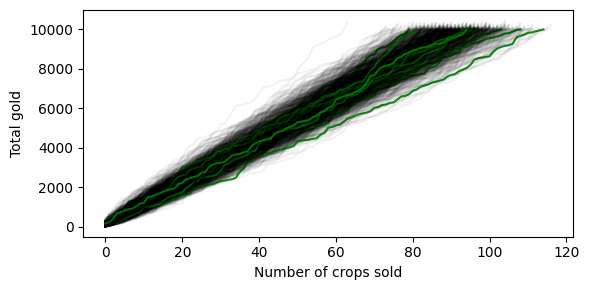

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

for i in rng.choice(np.arange(len(runs)), replace=False, size=1000):
    run = runs[i]
    ys = run
    xs = np.arange(len(ys))
    hit_target_value = run[-1] == target_value
    ax.plot(xs, ys, color="black" if not hit_target_value else "green", alpha=0.05 if not hit_target_value else 0.9)

ax.set_xlabel("Number of crops sold")
ax.set_ylabel("Total gold")

fig.tight_layout()
#fig.savefig("data/")
plt.show()

In [112]:
target_value = 111111
n = 100000000

n_runs = 0
n_successful_runs = 0
while n_runs < 10000000:
    crops = rng.integers(0, n_crops, size=n)
    qualities = rng.choice([0, 1, 2], size=n, p=[basic_prob, silver_prob, gold_prob])
    sales = prices[crops, qualities]
    
    total_gold = 0
    for sale in tqdm(sales, desc=f"Found {n_runs} runs"):
        total_gold += sale
        if total_gold >= target_value:
            n_runs += 1
            if total_gold == target_value:
                n_successful_runs += 1
            total_gold = 0
    print(f"Of {n_runs} runs, {n_successful_runs} were successful ({n_successful_runs / n_runs:.3%})")

Found 0 runs: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6585964.87it/s]


Of 97083 runs, 874 were successful (0.900%)


Found 97083 runs: 100%|███████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6354798.57it/s]


Of 194163 runs, 1862 were successful (0.959%)


Found 194163 runs: 100%|██████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6439510.78it/s]


Of 291250 runs, 2726 were successful (0.936%)


Found 291250 runs: 100%|██████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6445907.22it/s]


Of 388329 runs, 3640 were successful (0.937%)


Found 388329 runs: 100%|██████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6404081.80it/s]


Of 485421 runs, 4512 were successful (0.930%)


Found 485421 runs: 100%|██████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6451679.99it/s]


Of 582513 runs, 5392 were successful (0.926%)


Found 582513 runs: 100%|██████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6443136.65it/s]


Of 679600 runs, 6322 were successful (0.930%)


Found 679600 runs: 100%|██████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6393528.82it/s]


Of 776692 runs, 7225 were successful (0.930%)


Found 776692 runs: 100%|██████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6432514.45it/s]


Of 873775 runs, 8144 were successful (0.932%)


Found 873775 runs: 100%|██████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6435167.48it/s]


Of 970856 runs, 9065 were successful (0.934%)


Found 970856 runs: 100%|██████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6431123.67it/s]


Of 1067935 runs, 9954 were successful (0.932%)


Found 1067935 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6412074.50it/s]


Of 1165021 runs, 10855 were successful (0.932%)


Found 1165021 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6422487.13it/s]


Of 1262112 runs, 11760 were successful (0.932%)


Found 1262112 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6400112.21it/s]


Of 1359206 runs, 12664 were successful (0.932%)


Found 1359206 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6387539.35it/s]


Of 1456292 runs, 13576 were successful (0.932%)


Found 1456292 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6439779.02it/s]


Of 1553374 runs, 14496 were successful (0.933%)


Found 1553374 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6412222.42it/s]


Of 1650461 runs, 15362 were successful (0.931%)


Found 1650461 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6329441.64it/s]


Of 1747547 runs, 16265 were successful (0.931%)


Found 1747547 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6372853.91it/s]


Of 1844644 runs, 17146 were successful (0.930%)


Found 1844644 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:16<00:00, 6139707.09it/s]


Of 1941736 runs, 18024 were successful (0.928%)


Found 1941736 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6379519.75it/s]


Of 2038841 runs, 18875 were successful (0.926%)


Found 2038841 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6455037.03it/s]


Of 2135924 runs, 19755 were successful (0.925%)


Found 2135924 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6573168.63it/s]


Of 2233009 runs, 20655 were successful (0.925%)


Found 2233009 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6377611.60it/s]


Of 2330105 runs, 21559 were successful (0.925%)


Found 2330105 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6408342.50it/s]


Of 2427191 runs, 22470 were successful (0.926%)


Found 2427191 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6524622.93it/s]


Of 2524277 runs, 23334 were successful (0.924%)


Found 2524277 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6648938.30it/s]


Of 2621358 runs, 24215 were successful (0.924%)


Found 2621358 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6544343.74it/s]


Of 2718460 runs, 25116 were successful (0.924%)


Found 2718460 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6487952.56it/s]


Of 2815543 runs, 26053 were successful (0.925%)


Found 2815543 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6486484.25it/s]


Of 2912649 runs, 26927 were successful (0.924%)


Found 2912649 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6466150.07it/s]


Of 3009741 runs, 27829 were successful (0.925%)


Found 3009741 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6657175.77it/s]


Of 3106825 runs, 28699 were successful (0.924%)


Found 3106825 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6475260.68it/s]


Of 3203908 runs, 29613 were successful (0.924%)


Found 3203908 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6465367.83it/s]


Of 3300997 runs, 30522 were successful (0.925%)


Found 3300997 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6484828.19it/s]


Of 3398070 runs, 31494 were successful (0.927%)


Found 3398070 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6637794.41it/s]


Of 3495163 runs, 32371 were successful (0.926%)


Found 3495163 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6411489.34it/s]


Of 3592234 runs, 33299 were successful (0.927%)


Found 3592234 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6445708.71it/s]


Of 3689312 runs, 34155 were successful (0.926%)


Found 3689312 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6458758.08it/s]


Of 3786419 runs, 35006 were successful (0.925%)


Found 3786419 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6506049.62it/s]


Of 3883512 runs, 35901 were successful (0.924%)


Found 3883512 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6502953.58it/s]


Of 3980600 runs, 36774 were successful (0.924%)


Found 3980600 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6489196.65it/s]


Of 4077694 runs, 37672 were successful (0.924%)


Found 4077694 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6455800.08it/s]


Of 4174791 runs, 38525 were successful (0.923%)


Found 4174791 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6466583.73it/s]


Of 4271890 runs, 39415 were successful (0.923%)


Found 4271890 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6448991.61it/s]


Of 4368980 runs, 40370 were successful (0.924%)


Found 4368980 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6473354.98it/s]


Of 4466054 runs, 41288 were successful (0.924%)


Found 4466054 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6459626.56it/s]


Of 4563127 runs, 42173 were successful (0.924%)


Found 4563127 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6450654.51it/s]


Of 4660211 runs, 43123 were successful (0.925%)


Found 4660211 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6391005.43it/s]


Of 4757300 runs, 44049 were successful (0.926%)


Found 4757300 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6417392.06it/s]


Of 4854402 runs, 44950 were successful (0.926%)


Found 4854402 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6419781.07it/s]


Of 4951488 runs, 45872 were successful (0.926%)


Found 4951488 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6636826.64it/s]


Of 5048571 runs, 46745 were successful (0.926%)


Found 5048571 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6498779.04it/s]


Of 5145656 runs, 47636 were successful (0.926%)


Found 5145656 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6400598.98it/s]


Of 5242753 runs, 48570 were successful (0.926%)


Found 5242753 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6451411.36it/s]


Of 5339835 runs, 49481 were successful (0.927%)


Found 5339835 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6489602.18it/s]


Of 5436913 runs, 50299 were successful (0.925%)


Found 5436913 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6466412.25it/s]


Of 5534000 runs, 51213 were successful (0.925%)


Found 5534000 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6456916.25it/s]


Of 5631080 runs, 52101 were successful (0.925%)


Found 5631080 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6490951.06it/s]


Of 5728160 runs, 53048 were successful (0.926%)


Found 5728160 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6498134.46it/s]


Of 5825247 runs, 53949 were successful (0.926%)


Found 5825247 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6416957.21it/s]


Of 5922332 runs, 54824 were successful (0.926%)


Found 5922332 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6326381.10it/s]


Of 6019423 runs, 55709 were successful (0.925%)


Found 6019423 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6559748.12it/s]


Of 6116505 runs, 56603 were successful (0.925%)


Found 6116505 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6536350.47it/s]


Of 6213594 runs, 57496 were successful (0.925%)


Found 6213594 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6510552.73it/s]


Of 6310688 runs, 58366 were successful (0.925%)


Found 6310688 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6587614.43it/s]


Of 6407781 runs, 59279 were successful (0.925%)


Found 6407781 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6557464.70it/s]


Of 6504876 runs, 60185 were successful (0.925%)


Found 6504876 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6551425.34it/s]


Of 6601942 runs, 61086 were successful (0.925%)


Found 6601942 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6560586.72it/s]


Of 6699019 runs, 61984 were successful (0.925%)


Found 6699019 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6567703.94it/s]


Of 6796104 runs, 62910 were successful (0.926%)


Found 6796104 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6453883.37it/s]


Of 6893176 runs, 63785 were successful (0.925%)


Found 6893176 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6560115.94it/s]


Of 6990255 runs, 64684 were successful (0.925%)


Found 6990255 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:14<00:00, 6764854.57it/s]


Of 7087341 runs, 65588 were successful (0.925%)


Found 7087341 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6572141.86it/s]


Of 7184434 runs, 66469 were successful (0.925%)


Found 7184434 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6515303.15it/s]


Of 7281525 runs, 67348 were successful (0.925%)


Found 7281525 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6507080.88it/s]


Of 7378610 runs, 68245 were successful (0.925%)


Found 7378610 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6500600.20it/s]


Of 7475684 runs, 69158 were successful (0.925%)


Found 7475684 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6551445.50it/s]


Of 7572777 runs, 70078 were successful (0.925%)


Found 7572777 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6470231.67it/s]


Of 7669884 runs, 70992 were successful (0.926%)


Found 7669884 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6548995.14it/s]


Of 7766969 runs, 71858 were successful (0.925%)


Found 7766969 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6565056.23it/s]


Of 7864048 runs, 72699 were successful (0.924%)


Found 7864048 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6523246.62it/s]


Of 7961142 runs, 73589 were successful (0.924%)


Found 7961142 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6560823.98it/s]


Of 8058250 runs, 74538 were successful (0.925%)


Found 8058250 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6531558.74it/s]


Of 8155343 runs, 75436 were successful (0.925%)


Found 8155343 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6555297.41it/s]


Of 8252428 runs, 76366 were successful (0.925%)


Found 8252428 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6537800.89it/s]


Of 8349514 runs, 77262 were successful (0.925%)


Found 8349514 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:15<00:00, 6569493.25it/s]


Of 8446618 runs, 78145 were successful (0.925%)


Found 8446618 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:14<00:00, 6674760.57it/s]


Of 8543701 runs, 79030 were successful (0.925%)


Found 8543701 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:14<00:00, 6739598.06it/s]


Of 8640785 runs, 79945 were successful (0.925%)


Found 8640785 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:14<00:00, 6746514.80it/s]


Of 8737871 runs, 80851 were successful (0.925%)


Found 8737871 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:14<00:00, 6720316.24it/s]


Of 8834970 runs, 81722 were successful (0.925%)


Found 8834970 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:14<00:00, 6749240.44it/s]


Of 8932056 runs, 82610 were successful (0.925%)


Found 8932056 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:14<00:00, 6763507.46it/s]


Of 9029156 runs, 83500 were successful (0.925%)


Found 9029156 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:14<00:00, 6679737.24it/s]


Of 9126242 runs, 84414 were successful (0.925%)


Found 9126242 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:14<00:00, 6733139.37it/s]


Of 9223333 runs, 85292 were successful (0.925%)


Found 9223333 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:14<00:00, 6731390.21it/s]


Of 9320407 runs, 86149 were successful (0.924%)


Found 9320407 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:14<00:00, 6748917.58it/s]


Of 9417488 runs, 87050 were successful (0.924%)


Found 9417488 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:14<00:00, 6742385.10it/s]


Of 9514573 runs, 87958 were successful (0.924%)


Found 9514573 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:14<00:00, 6733016.15it/s]


Of 9611658 runs, 88878 were successful (0.925%)


Found 9611658 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:14<00:00, 6744302.96it/s]


Of 9708755 runs, 89720 were successful (0.924%)


Found 9708755 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:14<00:00, 6742138.10it/s]


Of 9805837 runs, 90599 were successful (0.924%)


Found 9805837 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:14<00:00, 6747955.78it/s]


Of 9902931 runs, 91448 were successful (0.923%)


Found 9902931 runs: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [00:14<00:00, 6766749.11it/s]

Of 10000019 runs, 92336 were successful (0.923%)


In [113]:
print(f"Of {n_runs} runs, {n_successful_runs} were successful ({n_successful_runs / n_runs:.3%})")

Of 10000019 runs, 92336 were successful (0.923%)


In [127]:
target_value = 111121
n = 100000000
n_target_runs = 10000000
n_sales_history = 8

run_history = np.empty((n_target_runs, n_sales_history), dtype=np.int32)
n_runs = 0
while n_runs < n_target_runs:
    crops = rng.integers(0, n_crops, size=n)
    qualities = rng.choice([0, 1, 2], size=n, p=[basic_prob, silver_prob, gold_prob])
    sales = prices[crops, qualities]

    run = []
    total_gold = 0
    for sale in sales:
        total_gold += sale
        run.append(sale)
        if total_gold >= target_value:
            run_history[n_runs, :] = np.cumsum(run)[-n_sales_history:]
            n_runs += 1
            if n_runs >= n_target_runs:
                break
            total_gold = 0
            run = []
    print(f"Completed {n_runs} / {n_target_runs} runs.")

Completed 97092 / 10000000 runs.
Completed 194169 / 10000000 runs.
Completed 291230 / 10000000 runs.
Completed 388319 / 10000000 runs.
Completed 485397 / 10000000 runs.
Completed 582482 / 10000000 runs.
Completed 679574 / 10000000 runs.
Completed 776642 / 10000000 runs.
Completed 873714 / 10000000 runs.
Completed 970792 / 10000000 runs.
Completed 1067855 / 10000000 runs.
Completed 1164936 / 10000000 runs.
Completed 1262012 / 10000000 runs.
Completed 1359091 / 10000000 runs.
Completed 1456176 / 10000000 runs.
Completed 1553253 / 10000000 runs.
Completed 1650335 / 10000000 runs.
Completed 1747408 / 10000000 runs.
Completed 1844483 / 10000000 runs.
Completed 1941562 / 10000000 runs.
Completed 2038639 / 10000000 runs.
Completed 2135712 / 10000000 runs.
Completed 2232786 / 10000000 runs.
Completed 2329863 / 10000000 runs.
Completed 2426948 / 10000000 runs.
Completed 2524014 / 10000000 runs.
Completed 2621090 / 10000000 runs.
Completed 2718168 / 10000000 runs.
Completed 2815239 / 10000000 ru

In [117]:
np.iinfo(np.int32)

iinfo(min=-2147483648, max=2147483647, dtype=int32)

In [128]:
run_history[:, 0].max()

110963

In [130]:
lowest_value_with_full_data = run_history[:, 0].max()
start_value = target_value - 50
assert start_value >= lowest_value_with_full_data
start_value, target_value

(111071, 111121)

In [136]:
(run_history == 111111).any(axis=1).sum()

92015

In [168]:
xs = np.arange(start_value, target_value + 1)
ys = []
cis = []
for x in tqdm(xs, desc="Computing hits"):
    n_history = (run_history == x).any(axis=1).sum()
    y = n_history
    ys.append(y)
    binom = binomtest(k=n_history, n=n_target_runs, p=0.00925)
    cis.append(tuple(binom.proportion_ci()))
    
cis = np.array(cis).T
cis.shape

Computing hits: 100%|████████████████████████████████████████████████████████████| 51/51 [00:05<00:00,  9.01it/s]


(2, 51)

In [143]:
ys = np.array(ys)
ys_pct = ys / n_target_runs
ys_pct.mean()

0.009259437254901963

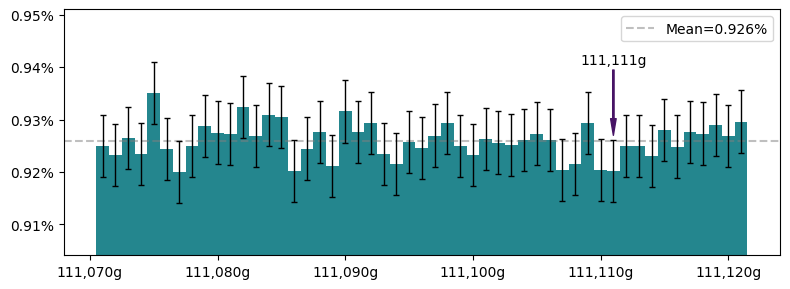

In [239]:
# plot:
# for each value between and target_value, compute the percentage of the runs with that value


fig, ax = plt.subplots(1, 1, figsize=(8, 3))

ax.bar(xs, ys_pct, color=matplotlib.cm.viridis(0.45789), width=1)
ax.axhline(ys_pct.mean(), color="gray", alpha=0.5, linestyle="--", label=f"Mean={ys_pct.mean():.3%}")
cis_delta = np.abs(cis - ys_pct)
ax.errorbar(xs, ys_pct, yerr=cis_delta, ecolor="black", capsize=2, elinewidth=1, linewidth=0)

margin = 0.0001
ax.set_ylim(bottom=cis.min() - margin, top=cis.max() + margin)
ax.annotate("111,111g", (111111, 0.00927), xytext=(111111, 0.0094), xycoords="data", ha="center", va="bottom", arrowprops={
    "width": 1,
    "color": matplotlib.cm.viridis(0.05),
    "headwidth": 4,
})
ax.legend()
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, pos: f"{y:.2%}"))
ax.xaxis.set_major_formatter(lambda x, pos: f"{x:,.0f}g")

fig.tight_layout()
fig.savefig("data/derived/stardew_valley_various_targets.png", dpi=72)
plt.show()